# Rose's analysis

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import (auc, confusion_matrix, roc_curve, 
                             accuracy_score, precision_score)
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Load data
df_raw = pd.read_csv("data.csv", index_col=[0])
# Drop empty column
df_raw=df_raw.drop('Unnamed: 32', axis=1)

In [3]:
# Turn B and M into 0 and 1
one_hot_df = pd.get_dummies(df_raw, drop_first=True)

In [4]:
one_hot_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [5]:
# Change spaces in names to underscores
one_hot_df=one_hot_df.rename(columns={"concave points_mean":"concave_points_mean",
                            "concave points_se":"concave_points_se",
                            "concave points_worst":"concave_points_worst"})

In [6]:
# Set target and features
target = one_hot_df['diagnosis_M']
one_hot_df_indep = one_hot_df.drop('diagnosis_M', axis=1)

In [7]:
# Standardise the One-hot encoded features

std_features = (one_hot_df_indep.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
# Split into train and test data

X = one_hot_df_indep.values

X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2)

## Random forest model

### Making the model

Choose max_features to be sqrt(30)~5

Just run with these hyperparameters for now, will improve on them later

In [9]:
# Initiate the Random Forest Classifier object with the chosen hyperparameters
clf_rf = RandomForestClassifier(random_state = 33, n_estimators=50, max_depth=5, 
                                min_samples_leaf=30, max_features=5)

# Fit the Random Forest to training data
clf_rf.fit(X_train, y_train)

# Predict labels and probabilities on test data
pred_clf_rf = clf_rf.predict(X_test)
proba_clf_rf = clf_rf.predict_proba(X_test)

In [10]:
print(pred_clf_rf)

[0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0
 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 0 0]


### Evaluating the model

In [11]:
# Print out the model accuracy below
print("Accuracy:", metrics.accuracy_score(y_test, pred_clf_rf))

Accuracy: 0.9385964912280702


In [12]:
# Code for if I want to change the threshold and calculate the new labels

#thres = 0.5
#target_predict_rf = np.where(proba_clf_rf[:,1] > thres, 1, 0)
#target_actual = y_test

In [13]:
# How many actual "positive" (e.g., >50k) cases do we have in our train/test dataset? 

# What % of each dataset does it make up?

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 39.12% (178/455)
% positive in test set (count/total): 29.82% (34/114)


In [14]:
# How many "positive" (e.g., Malignant) cases do we predict with the Random Forest?

rf_pos_count = pred_clf_rf.sum()
print('% positive in Random Forest predictions (count/total): {:.2f}% ({}/{})'
      .format(rf_pos_count * 100.0 / len(y_test), rf_pos_count, len(y_test)))

% positive in Random Forest predictions (count/total): 32.46% (37/114)


Confusion matrix, without normalization
[[75  5]
 [ 2 32]]
Normalized confusion matrix
[[0.9375     0.0625    ]
 [0.05882353 0.94117647]]


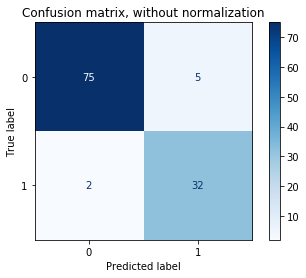

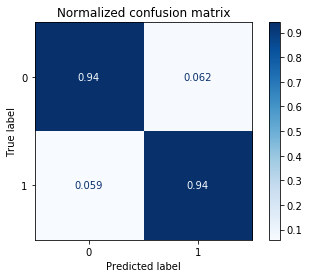

In [15]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Here, the normalized comfusion matrix shows precision

In [16]:
# Print accuracy and precision
rf_tn, rf_fn, rf_fp, rf_tp = confusion_matrix(y_test, pred_clf_rf).ravel()
rf_acc = round((rf_tp + rf_tn) / X_test.shape[0], 3) * 100
print('Random forest accuracy: {:.2f}%'.format(rf_acc))
rf_precision = round((rf_tp / (rf_tp + rf_fp)), 2) * 100
print('Random forest precision: {:.2f}%'.format(rf_precision))

Random forest accuracy: 93.90%
Random forest precision: 94.00%


In [17]:
# Print AUC
auc = metrics.roc_auc_score(y_test, proba_clf_rf[:,1])
print("AUC: ", auc)

AUC:  0.9911764705882353


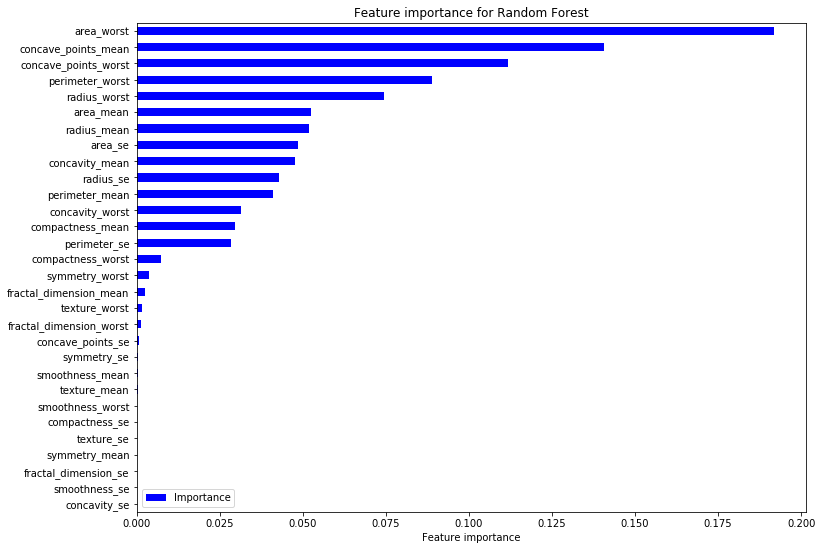

In [18]:
# Plot feature importance
features_log = pd.DataFrame(clf_rf.feature_importances_, index = one_hot_df_indep.columns.tolist(), 
                            columns = ['Importance'])
features_log = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(12,9), color = 'blue')
plt.xlabel('Feature importance')
plt.title('Feature importance for Random Forest')
plt.show()

### Tuning the hyperparameters

In [19]:
# Take a look at the parameters of that we used before
pprint(clf_rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 30,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 33,
 'verbose': 0,
 'warm_start': False}


In [20]:
# Let's search over the following parameter settings

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 55, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [30, 40, 50]
# Method of selecting samples for training each tree
bootstrap = [True]

In [21]:
# Complete the random grid dictionary with all of the parameters we are searching over: 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               }

In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model, similarly to how we did before:
rf = RandomForestClassifier()

# Declare the random search using 3 fold cross validation, searching over 100 combinations of the parameters 
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [23]:
# Now fit the random search model with our training data below
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [24]:
# What is the best choice of hyperparameters found by the random search? Do this below
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 30,
 'max_features': 'auto',
 'max_depth': 42,
 'bootstrap': True}

In [25]:
# Let's find out how the accuracy of this model with tuned hyperparameters compares! 
# Predict the labels on your test set, as we did before, and then print the model accuracy
hyp_pred_rf = rf_random.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, hyp_pred_rf))

Accuracy: 0.956140350877193
